<a href="https://colab.research.google.com/github/YQ617/code-samples/blob/Machine-Learning/Homework_1_Yanfei_Qin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HOMEWORK 1: Classification
### Name: Yanfei Qin
### PennKey: yfqin
### PennID: 51386260

##Section 1: Data Preprocessing

In [ ]:
from google.colab import files
files.upload()

Saving Student Performance.csv to Student Performance.csv


{'Student Performance.csv': b"gender,race/ethnicity,parental level of education,lunch,math score,reading score,writing score,total score,test preparation course,admission prospect\r\nfemale,group B,bachelor's degree,standard,72,72,74,218,none,medium\r\nfemale,group C,some college,standard,69,90,88,247,completed,high\r\nfemale,group B,master's degree,standard,90,95,93,278,none,high\r\nmale,group A,associate's degree,free/reduced,47,57,44,148,none,low\r\nmale,group C,some college,standard,76,78,75,229,none,high\r\nfemale,group B,associate's degree,standard,71,83,78,232,none,high\r\nfemale,group B,some college,standard,88,95,92,275,completed,high\r\nmale,group B,some college,free/reduced,40,43,39,122,none,low\r\nmale,group D,high school,free/reduced,64,64,67,195,completed,medium\r\nfemale,group B,high school,free/reduced,38,60,50,148,none,low\r\nmale,group C,associate's degree,standard,58,54,52,164,none,medium\r\nmale,group D,associate's degree,standard,40,52,43,135,none,low\r\nfemale,gro

In [ ]:
import pandas as pd
StudentPer = pd.read_csv('Student Performance.csv')

In [ ]:
StudentPer

,gender,race/ethnicity,parental level of education,lunch,math score,reading score,writing score,total score,test preparation course,admission prospect
0,female,group B,bachelor's degree,standard,72,72,74,218,none,medium
1,female,group C,some college,standard,69,90,88,247,completed,high
2,female,group B,master's degree,standard,90,95,93,278,none,high
3,male,group A,associate's degree,free/reduced,47,57,44,148,none,low
4,male,group C,some college,standard,76,78,75,229,none,high
...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,88,99,95,282,completed,high
996,male,group C,high school,free/reduced,62,55,55,172,none,medium
997,female,group C,high school,free/reduced,59,71,65,195,completed,medium
998,female,group D,some college,standard,68,78,77,223,completed,high


In [ ]:
StudentPer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   math score                   1000 non-null   int64 
 5   reading score                1000 non-null   int64 
 6   writing score                1000 non-null   int64 
 7   total score                  1000 non-null   int64 
 8   test preparation course      1000 non-null   object
 9   admission prospect           1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 78.2+ KB


In [ ]:
StudentPer = StudentPer.rename(columns={'race/ethnicity':'race_ethnicity'})
StudentPer = StudentPer.rename(columns={'parental level of education':'parental_level_of_education'})
StudentPer = StudentPer.rename(columns={'math score':'math_score'})
StudentPer = StudentPer.rename(columns={'reading score':'reading_score'})
StudentPer = StudentPer.rename(columns={'writing score':'writing_score'})
StudentPer = StudentPer.rename(columns={'total score':'total_score'})
StudentPer = StudentPer.rename(columns={'test preparation course':'test_preparation_course'})
StudentPer = StudentPer.rename(columns={'admission prospect':'admission_prospect'})
StudentPer.head()

,gender,race_ethnicity,parental_level_of_education,lunch,math_score,reading_score,writing_score,total_score,test_preparation_course,admission_prospect
0,female,group B,bachelor's degree,standard,72,72,74,218,none,medium
1,female,group C,some college,standard,69,90,88,247,completed,high
2,female,group B,master's degree,standard,90,95,93,278,none,high
3,male,group A,associate's degree,free/reduced,47,57,44,148,none,low
4,male,group C,some college,standard,76,78,75,229,none,high


In [ ]:
StudentPer.test_preparation_course.unique()

array(['none', 'completed'], dtype=object)

In [ ]:
StudentPer['test_preparation_course'].replace(['none', 'completed'],
                        [0, 1], inplace=True)

In [ ]:
StudentPer.race_ethnicity.unique()

array(['group B', 'group C', 'group A', 'group D', 'group E'],
      dtype=object)

In [ ]:
StudentPer['race_ethnicity'].replace(['group A', 'group B', 'group C', 'group D', 'group E'],
                        [0, 1, 2, 3, 4], inplace=True)

In [ ]:
StudentPer.parental_level_of_education.unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

In [ ]:
StudentPer['parental_level_of_education'].replace(['some high school', 'high school', 'some college', "associate's degree", "bachelor's degree", "master's degree"],
                        [0, 1, 2, 3, 4, 5], inplace=True)

In [ ]:
StudentPer.gender.unique()

array(['female', 'male'], dtype=object)

In [ ]:
StudentPer['gender'].replace(['male', 'female'],
                             [0, 1], inplace=True)

In [ ]:
StudentPer.lunch.unique()

array(['standard', 'free/reduced'], dtype=object)

In [ ]:
StudentPer['lunch'].replace(['free/reduced', 'standard'],
                             [0, 1], inplace=True)

In [ ]:
StudentPer.admission_prospect.unique()

array(['medium', 'high', 'low'], dtype=object)

In [ ]:
StudentPer['admission_prospect'].replace(['low', 'medium', 'high'],
                             [0, 1, 2], inplace=True)

In [ ]:
StudentPer

,gender,race_ethnicity,parental_level_of_education,lunch,math_score,reading_score,writing_score,total_score,test_preparation_course,admission_prospect
0,1,1,4,1,72,72,74,218,0,1
1,1,2,2,1,69,90,88,247,1,2
2,1,1,5,1,90,95,93,278,0,2
3,0,0,3,0,47,57,44,148,0,0
4,0,2,2,1,76,78,75,229,0,2
...,...,...,...,...,...,...,...,...,...,...
995,1,4,5,1,88,99,95,282,1,2
996,0,2,1,0,62,55,55,172,0,1
997,1,2,1,0,59,71,65,195,1,1
998,1,3,2,1,68,78,77,223,1,2


In [ ]:
StudentPer.describe()

,gender,race_ethnicity,parental_level_of_education,lunch,math_score,reading_score,writing_score,total_score,test_preparation_course,admission_prospect
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.518000,2.174000,2.081000,0.645000,66.08900,69.169000,68.054000,203.312000,0.358000,1.187000
std,0.499926,1.157179,1.460333,0.478753,15.16308,14.600192,15.195657,42.771978,0.479652,0.700372
min,0.000000,0.000000,0.000000,0.000000,0.00000,17.000000,10.000000,27.000000,0.000000,0.000000
25%,0.000000,1.000000,1.000000,0.000000,57.00000,59.000000,57.750000,175.000000,0.000000,1.000000
50%,1.000000,2.000000,2.000000,1.000000,66.00000,70.000000,69.000000,205.000000,0.000000,1.000000
75%,1.000000,3.000000,3.000000,1.000000,77.00000,79.000000,79.000000,233.000000,1.000000,2.000000
max,1.000000,4.000000,5.000000,1.000000,100.00000,100.000000,100.000000,300.000000,1.000000,2.000000


In [ ]:
StudentPer.isnull().values.any()

False

##Section 2: Model Training

###2.1 Look at the dataset and determine which features will most likely determine a student’s admission prospect.

In [ ]:
StudentPer.corr()

,gender,race_ethnicity,parental_level_of_education,lunch,math_score,reading_score,writing_score,total_score,test_preparation_course,admission_prospect
gender,1.000000,0.001502,0.043934,-0.021372,-0.167982,0.244313,0.301225,0.130861,-0.006028,0.120457
race_ethnicity,0.001502,1.000000,0.095906,0.046563,0.216415,0.145253,0.165691,0.185168,0.017508,0.156194
parental_level_of_education,0.043934,0.095906,1.000000,-0.023259,0.159432,0.190908,0.236715,0.205785,-0.007143,0.158407
lunch,-0.021372,0.046563,-0.023259,1.000000,0.350877,0.229560,0.245769,0.290064,-0.017044,0.236991
math_score,-0.167982,0.216415,0.159432,0.350877,1.000000,0.817580,0.802642,0.918746,0.177702,0.800001
reading_score,0.244313,0.145253,0.190908,0.229560,0.817580,1.000000,0.954598,0.970331,0.241780,0.850426
writing_score,0.301225,0.165691,0.236715,0.245769,0.802642,0.954598,1.000000,0.965667,0.312946,0.846494
total_score,0.130861,0.185168,0.205785,0.290064,0.918746,0.970331,0.965667,1.000000,0.256710,0.874636
test_preparation_course,-0.006028,0.017508,-0.007143,-0.017044,0.177702,0.241780,0.312946,0.256710,1.000000,0.253439
admission_prospect,0.120457,0.156194,0.158407,0.236991,0.800001,0.850426,0.846494,0.874636,0.253439,1.000000


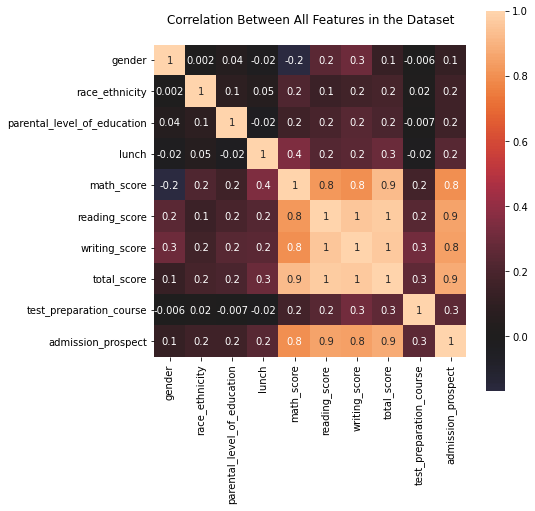

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
fig = plt.figure(figsize=(7, 7))
sns.heatmap(
    StudentPer.corr(), center=0, square=True, annot=True, fmt='.1g'
)
plt.title('Correlation Between All Features in the Dataset\n')
plt.savefig('corrheatmap.png')

Determined by the correlations between all features within our original dataset, we are able to see that the features that highly correlate with "admission prospect" are: "math score", "reading score", "writing score" and "total score." Even if we would think that whether a student takes "test preparation course" or not will largely influence his/her admission result, our analysis of this dataset shows it is not the case for these students. Thus, our final model will only include the above-mentioned four features.

In [ ]:
StudentPer

,gender,race_ethnicity,parental_level_of_education,lunch,math_score,reading_score,writing_score,total_score,test_preparation_course,admission_prospect
0,1,1,4,1,72,72,74,218,0,1
1,1,2,2,1,69,90,88,247,1,2
2,1,1,5,1,90,95,93,278,0,2
3,0,0,3,0,47,57,44,148,0,0
4,0,2,2,1,76,78,75,229,0,2
...,...,...,...,...,...,...,...,...,...,...
995,1,4,5,1,88,99,95,282,1,2
996,0,2,1,0,62,55,55,172,0,1
997,1,2,1,0,59,71,65,195,1,1
998,1,3,2,1,68,78,77,223,1,2


###2.2 Use those features to create a training set and test set.

> 缩进块



In [ ]:
stu_y = StudentPer.pop('admission_prospect')
stu_X = StudentPer.drop(columns=['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course'])

from sklearn.model_selection import train_test_split
s_X_train, s_X_test, s_y_train, s_y_test = train_test_split(
    stu_X, stu_y, test_size=0.5, random_state=0, stratify=stu_y
)

In [ ]:
stu_y.value_counts(normalize=True)

1    0.475
2    0.356
0    0.169
Name: admission_prospect, dtype: float64

In [ ]:
s_y_train.value_counts(normalize=True)

1    0.476
2    0.356
0    0.168
Name: admission_prospect, dtype: float64

In [ ]:
s_y_test.value_counts(normalize=True)
#it can be seen above that the ratio of admission prospects (high, medium, low) has been successfully preserved in our test and training sets.

1    0.474
2    0.356
0    0.170
Name: admission_prospect, dtype: float64

###2.3 Implement a Logistic Regression model using python libraries (eg. Scikit-Learn), train the model, and predict the students’ admission prospects from the test set.

In [ ]:
from sklearn.linear_model import LogisticRegression
Admission_lr = LogisticRegression(random_state=0, solver='lbfgs', multi_class='ovr')

In [ ]:
Admission_lr.fit(s_X_train, s_y_train)

LogisticRegression(multi_class='ovr', random_state=0)

###2.4 Provide the confusion matrix and test the accuracy of the above model’s performance. How does the accuracy change if you use a different set of features for training and prediction?


In [ ]:
quality_preds = Admission_lr.predict(s_X_test)

In [ ]:
from google.colab import files
files.upload()
#here I uploaded 'classification.py' which can be found in https://github.com/stefmolin/ml-utils (provided by the author of our textbook)
#it allows me to draw confusion matrix quickly

Saving classification.py to classification.py


{'classification.py': b'"""Utilities for evaluating classification models."""\n\nimport matplotlib.pyplot as plt\nimport numpy as np\nimport seaborn as sns\nfrom sklearn.metrics import (\n    auc, average_precision_score, confusion_matrix,\n    precision_recall_curve, r2_score, roc_curve\n)\n\ndef confusion_matrix_visual(y_true, y_pred, class_labels, normalize=False,\n                            flip=False, ax=None, title=None, **kwargs):\n    """\n    Create a confusion matrix heatmap to evaluate classification.\n\n    Parameters:\n        - y_test: The true values for y\n        - preds: The predicted values for y\n        - class_labels: What to label the classes.\n        - normalize: Whether to plot the values as percentages.\n        - flip: Whether to flip the confusion matrix. This is helpful to get\n                TP in the top left corner and TN in the bottom right when dealing\n                with binary classification with labels True and False.\n        - ax: The matplot

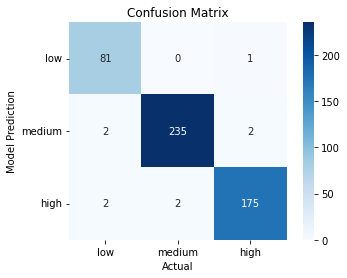

In [ ]:
from classification import confusion_matrix_visual
confusion_matrix_visual(s_y_test, quality_preds, ['low', 'medium', 'high'])
plt.savefig('Confusion_Matrix.png')

In [ ]:
#Accuracy for test set 
Admission_lr.score(s_X_test, s_y_test)

0.982

In [ ]:
#Accuracy for training set
Admission_lr.score(s_X_train, s_y_train)

0.976

In [ ]:
#error rate
from sklearn.metrics import zero_one_loss
zero_one_loss(s_y_test, quality_preds)

0.018000000000000016

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(s_y_test, quality_preds, target_names=['low','medium','high']))

              precision    recall  f1-score   support

         low       0.99      0.95      0.97        85
      medium       0.98      0.99      0.99       237
        high       0.98      0.98      0.98       178

    accuracy                           0.98       500
   macro avg       0.98      0.98      0.98       500
weighted avg       0.98      0.98      0.98       500



How does the accuracy change if you use a different set of features for training and prediction?

In [ ]:
#we now include "test preparation course" as a feature in our model.
stu_X2 = StudentPer.drop(columns=['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch'])

from sklearn.model_selection import train_test_split
s_X2_train, s_X2_test, s_y2_train, s_y2_test = train_test_split(
    stu_X2, stu_y, test_size=0.5, random_state=0, stratify=stu_y
)

In [ ]:
stu_y.value_counts(normalize=True)

1    0.475
2    0.356
0    0.169
Name: admission_prospect, dtype: float64

In [ ]:
s_y2_train.value_counts(normalize=True)

1    0.476
2    0.356
0    0.168
Name: admission_prospect, dtype: float64

In [ ]:
s_y2_test.value_counts(normalize=True)

1    0.474
2    0.356
0    0.170
Name: admission_prospect, dtype: float64

In [ ]:
Admission_lr2 = LogisticRegression(random_state=0, solver='lbfgs', multi_class='ovr')

In [ ]:
Admission_lr2.fit(s_X2_train, s_y2_train)

LogisticRegression(multi_class='ovr', random_state=0)

In [ ]:
quality_preds2 = Admission_lr2.predict(s_X2_test)

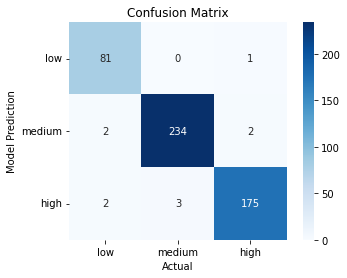

In [ ]:
confusion_matrix_visual(s_y2_test, quality_preds2, ['low', 'medium', 'high'])
plt.savefig('Confusion_Matrix2.png')

In [ ]:
#Accuracy for test set 
Admission_lr2.score(s_X2_test, s_y2_test)

0.98

In [ ]:
#Accuracy for training set
Admission_lr2.score(s_X2_train, s_y2_train)

0.972

In [ ]:
#error rate
zero_one_loss(s_y2_test, quality_preds2)

0.020000000000000018

In [ ]:
print(classification_report(s_y2_test, quality_preds2, target_names=['low','medium','high']))

              precision    recall  f1-score   support

         low       0.99      0.95      0.97        85
      medium       0.98      0.99      0.99       237
        high       0.97      0.98      0.98       178

    accuracy                           0.98       500
   macro avg       0.98      0.97      0.98       500
weighted avg       0.98      0.98      0.98       500



Answer: By now changing the features selected for the logistic regression model, the accuracy of the model in fact negatively changes.

In [ ]:
#to further validate our finding, I now include both "test_preparation_course" and "lunch" as a feature in our model.
stu_X3 = StudentPer.drop(columns=['gender', 'race_ethnicity', 'parental_level_of_education'])

from sklearn.model_selection import train_test_split
s_X3_train, s_X3_test, s_y3_train, s_y3_test = train_test_split(
    stu_X3, stu_y, test_size=0.5, random_state=0, stratify=stu_y
)

In [ ]:
stu_y.value_counts(normalize=True)

1    0.475
2    0.356
0    0.169
Name: admission_prospect, dtype: float64

In [ ]:
s_y3_train.value_counts(normalize=True)

1    0.476
2    0.356
0    0.168
Name: admission_prospect, dtype: float64

In [ ]:
s_y3_test.value_counts(normalize=True)

1    0.474
2    0.356
0    0.170
Name: admission_prospect, dtype: float64

In [ ]:
Admission_lr3 = LogisticRegression(random_state=0, solver='lbfgs', multi_class='ovr', max_iter=110)

In [ ]:
Admission_lr3.fit(s_X3_train, s_y3_train)

LogisticRegression(max_iter=110, multi_class='ovr', random_state=0)

In [ ]:
quality_preds3 = Admission_lr3.predict(s_X3_test)

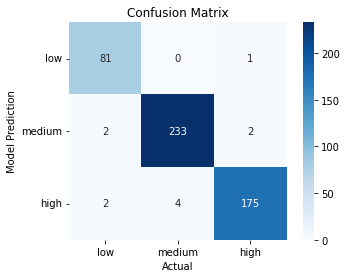

In [ ]:
confusion_matrix_visual(s_y3_test, quality_preds3, ['low', 'medium', 'high'])
plt.savefig('Confusion_Matrix3.png')

In [ ]:
#Accuracy for test set 
Admission_lr3.score(s_X3_test, s_y3_test)

0.978

In [ ]:
#Accuracy for training set
Admission_lr3.score(s_X3_train, s_y3_train)

0.97

In [ ]:
#error rate
zero_one_loss(s_y3_test, quality_preds3)

0.02200000000000002

In [ ]:
print(classification_report(s_y3_test, quality_preds3, target_names=['low','medium','high']))

              precision    recall  f1-score   support

         low       0.99      0.95      0.97        85
      medium       0.98      0.98      0.98       237
        high       0.97      0.98      0.97       178

    accuracy                           0.98       500
   macro avg       0.98      0.97      0.98       500
weighted avg       0.98      0.98      0.98       500

